# GA with numpy functions

By: Ximena Paniagua S.

A tomar en cuenta:

1. El uso de funciones numpy hace muy eficiente el código en temas de tiempo

2. El único "inconveniente" sería que la función best_fit la entrega en formato: [<function coeficiente2 at 0x0000018AEB6E7600>, '/', <function ident at 0x0000018AD95FE520>, '+', <function coeficiente2 at 0x0000018AEB6E7600>, '*', <function ident at 0x0000018AD95FE520>, '+', <function coeficiente1 at 0x0000018AEB6E7560>, '**', <function coeficiente1 at 0x0000018AEB6E7560>]

3. Todavía no encuentro una forma *no manual* de pasar de ese formato a la expresión simbólica de la función

4. Además, si se quiere correr el código, hay que tomar en cuenta que la función final sería algo como: (((<function coeficiente2 at 0x0000018AEB6E7600> / <function ident at 0x0000018AD95FE520>) + <function coeficiente2 at 0x0000018AEB6E7600>) * <function ident at 0x0000018AD95FE520> + <function coeficiente1 at 0x0000018AEB6E7560>) ** <function coeficiente1 at 0x0000018AEB6E7560>, es decir, hay que ir poniendo manualmente los paréntesis debido a que el código trata las funciones de izquierda a derecha y no como normalmente se haría, es decir, poniéndole prioridad a ciertas operaciones sobre otras. 

5. De tomas formas entrega una función bien fiteada! 

___________________________________________________________________________________________________________________________________________

To take into account:

1. The use of numpy functions makes the code very efficient in terms of time

2. The only "drawback" would be that the best_fit function delivers it in the format: [<function coefficient2 at 0x0000018AEB6E7600>, '/', <function identifier at 0x0000018AD95FE520>, '+', <function coefficient2 at 0x0000018AEB6E7600>, '*' , <feature identifier at 0x0000018AD95FE520>, '+', <feature coefficient1 at 0x0000018AEB6E7560>, '**', <feature coefficient1 at 0x0000018AEB6E7560>]

3. I still can't find a *non-manual* way to go from that format to the symbolic expression of the function

4. Furthermore, if you want to run the code, you must take into account that the final function would be something like: (((<coefficient2 function at 0x0000018AEB6E7600> / <ident function at 0x0000018AD95FE520>) + <coefficient2 function at 0x0000018AEB6E7600>) * <function ident at 0x0000018AD95FE520> + <function quotient1 at 0x0000018AEB6E7560>) ** <function quotient1 at 0x0000018AEB6E7560>, that is, you have to manually put the parentheses because the code treats the functions from left to right and not as normally would do, that is, giving priority to certain operations over others.

5. In every way it delivers a well-fitted function!

### Importar las librerías necesarias

*Import the necessary libraries*

In [1]:
import numpy as np
import random
from sympy import symbols, parse_expr, lambdify, srepr, sympify
import matplotlib.pyplot as plt
import time
x = symbols('x')

import logging
# Configuración básica del registro
logging.basicConfig(level=logging.INFO)

import warnings

# Ignorar todas las advertencias de RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Se extraen los datos de el parámetro de Hubble que se ajustarán a una función por encontrar.

*Hubble parameter data is extracted to be fitted to a function to find.*

In [2]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

print(z)

[0.07    0.09    0.12    0.17    0.179   0.199   0.2     0.27    0.28
 0.35    0.352   0.3802  0.4     0.4004  0.4247  0.44    0.44497 0.4783
 0.47    0.48    0.57    0.593   0.6     0.68    0.73    0.75    0.781
 0.8     0.875   0.88    0.9     1.037   1.3     1.363   1.43    1.53
 1.75    1.965   2.34   ]


La clase Create_Individual crea un individuo con un numero de cromosomas específico tal que: 

1. Si se le entregan 5 cromosomas el individuo tendrá 6. 
2. El individuo será una lista del tipo: ['x', '+', '1'] donde cada string es un cromosoma.
3. Los índices pares y el $0$ son expresiones. 
4. Los índices impares partiendo del $1$ son operaciones.
5. Si se le entrega a Create_Individual un individuo ya creado desde antes, devuelve ese individuo. 
6. Cabe recalcar que en un inicio el individuo es del tipo Create_Individual, y el método obtain_expression() entrega la expresion como una lista de strings. 

The Create_Individual class creates an individual with a specific chromosome number such that:

1. If 5 chromosomes are given, the individual will have 6.
2. The individual will be a list of the type: ['x', '+', '1'] where each string is a chromosome.
3. The even indices and $0$ are expressions.
4. Odd indices starting from $1$ are operations.
5. If an individual already created before is given to Create_Individual, it returns that individual.
6. It should be remembered that initially the individual is of type Create_Individuals, and the obtain_expression() method delivers the expression as a list of strings.

In [3]:
class Create_Individual:
    def __init__(self, params, expression = None):
        if expression is None:
            genes = [np.random.choice(params['genes']) for _ in range(0, params['number_of_genes'] + 1, 2)]
            operations = [np.random.choice(params['operaciones']) for _ in range(1, params['number_of_genes'] + 1, 2)]
            self.expression = [valor for par in zip(genes, operations) for valor in par] + [np.random.choice(params['genes'])] #se le suma un gen para que quede una funcion al final/No cambia el numero de cromosomas
        else:
            self.expression = [valor for valor in expression]

    def obtain_expressions(self): #da los cromosomas del individuo
        return self.expression

La clase Create_Generation crea una población inicial, la cual pasa por los siguientes procesos: 

1. Se eligen los padres más aptos de la poblacion inicial
2. Se combinan para generar cierta cantidad de hijos por cada uno
3. Dentro de tales hijos, cierta cantidad se muta

*The Create_Generation class creates an initial population, which goes through the following processes:*

1. *The fittest parents are chosen from the initial population*
2. *They combine to generate a certain number of children for each one*
3. *Within such children, a certain amount is mutated*

In [4]:
class Create_Generation:
    def __init__(self, ind_parameters, pop_parameters, fitness_function, expression = None):
        #Crea una poblacion inicial
        self.size = pop_parameters['size'] # Tamaño poblacion
        self.initial_poblation = ind_parameters['genes']
        self.initial_operation = ind_parameters['operaciones']
        self.mutation_rate = pop_parameters['mutation_rate']
        self.selection_rate = pop_parameters['selection _rate']
        self.fitness_function = fitness_function 

        if expression == None:
            self.individuals = [Create_Individual(ind_parameters)  for _ in range(self.size)]
        else:
            self.individuals = [Create_Individual(ind_parameters, expression = expression[i]) for i in range(len(expression))]

    def evaluar_expresion(self, x, expresion):
        resultado = expresion[0](x)

        i = 1
        while i < len(expresion):
            operador = expresion[i]
            funcion = expresion[i + 1]

            if operador == '+':
                resultado = resultado + funcion(x)
            elif operador == '-':
                resultado = resultado - funcion(x)
            elif operador == '*':
                resultado = resultado * funcion(x)
            elif operador == '/':
                resultado = resultado / funcion(x)
            elif operador == '**':
                resultado = resultado ** funcion(x)
            elif operador == 'comp':
                resultado = funcion(resultado)
            
            i += 2

        return resultado

    def child(self, parent, parent2, crossover_point):
        kid = []
        if len(parent) == 1 and len(parent2) == 1:
            kid = parent
        elif len(parent) == 1:
            kid[:0] = parent
            kid[1:] = parent2[1:]
        elif len(parent2) == 1:
            kid[:0] = parent2
            kid[1:] = parent[1:]
        else:                
            kid[:crossover_point] = parent[:crossover_point]
            kid[crossover_point:] = parent2[crossover_point:]
        return kid

    def get_parents(self, poblacion) -> np.array: # pares son expresiones e impares son operaciones
        n_parents = int((self.selection_rate)/100 * len(poblacion))
        parents = []
        for expresion in poblacion:
            parents.append(expresion.obtain_expressions())
        parents_evaluate = [self.evaluar_expresion(z, expresion) for expresion in parents]
        Chi = [self.fitness_function(function) for function in parents_evaluate]
        #Chi = np.array(Chi)
        #print('ANTES: ' +str(Chi))
        #inf_mask = np.isinf(Chi)
        #Chi[inf_mask] = np.nan
        #Chi = Chi.tolist()
        #print('DESPUES: ' +str(Chi))
        Minor_Chi = min(Chi)
        #print('El chi menor fue' + str(Minor_Chi))
        sorted_parents = [x for _, x in sorted(zip(Chi, parents), key=lambda pair: pair[0])]
        selected_parents = sorted_parents[:n_parents]
        non_selectec_parents = sorted_parents[n_parents:]
        r1 = random.random()
        r2 = random.random()
        no_apto = random.choice(non_selectec_parents)
        no_apto_2 = random.choice(non_selectec_parents)
        no_apto_3 = random.choice(non_selectec_parents)
        if r1>r2:
            Selected_parents = selected_parents + [no_apto] + [no_apto_2] + [no_apto_3]
        else:
            Selected_parents = selected_parents
        return Selected_parents, Minor_Chi
    
    def crossover(self, parents: np.array) -> np.array:
        offspring = []
        for parent in parents:
            crossover_point = random.choice(range(1, len(parents))) #se elige un numero entre 1 y el penultimo cormosoma para que siempre haya crossover
            parent2 = random.choice(parents)
            parent3 = random.choice(parents)
            parent4 = random.choice(parents)
            parent5 = random.choice(parents)
            parent6 = random.choice(parents)
            kid = self.child(parent, parent2, crossover_point)
            kid2 = self.child(parent, parent3, crossover_point)
            kid3 = self.child(parent, parent4, crossover_point)
            kid4 = self.child(parent, parent5, crossover_point)
            kid5 = self.child(parent, parent6, crossover_point)
            offspring.append(kid)
            offspring.append(kid2)
            offspring.append(kid3)
            offspring.append(kid4)
            offspring.append(kid5)

        return offspring
    
    def mutate(self, offspring_crossover) -> np.array: # contras: a veces se pude mutar el mismo individuo
        num_mutations = int(len(offspring_crossover)*self.mutation_rate/100)
        for num in range(num_mutations):
            idx_mutation = random.choice(range(len(offspring_crossover))) # se elige individuo que se va a mutar
            ind_mutate = offspring_crossover[idx_mutation]
            g = random.choice(range(len(ind_mutate))) #numero de gen que se va a mutar
            if g % 2 == 0 or g==0:
                new_gen = random.choice(self.initial_poblation)
                ind_mutate[g] = new_gen
            else:
                new_gen = random.choice(self.initial_operation)
                ind_mutate[g] = new_gen
        return offspring_crossover

La clase Evolución itera sobre las generaciones requeridas hasta llegar a la última. Durante esta iteración se guardan los menores $\chi^2$ de cada generación. Finalmente devuelve la última generación y los $\chi^2$ antes guardados. 

*The Evolution class iterates over the required generations until it reaches the last one. During this iteration the smallest $\chi^2$ of each generation are saved. Finally it returns the last generation and the previously saved $\chi^2$.*

In [5]:
class Evolution:
    def __init__(self, gen_parameter, ind_parameters, pop_params, fitness_function): #gen_parameter = {'selection_rate' : 20, 'mutation_rate' : 10, 'num_generations': 100}
        self.selection_rate = gen_parameter['selection_rate']
        self.mutation_rate = gen_parameter['mutation_rate']
        self.num_generations = gen_parameter['num_generations']
        self.fitness_function = fitness_function
        self.ind_parameters = ind_parameters
        self.pop_params = pop_params

    def Iteracion(self):
        inicio_tiempo = time.time()
        Generations = []
        Chi = []
        for n in range(self.num_generations):
            logging.info(f'Número de la generación: {n}')
            if n == 0: 
                A = Create_Generation(self.ind_parameters, self.pop_params, self.fitness_function)
                initial_poblation = A.individuals
                parents, minor_chi = A.get_parents(initial_poblation)
                Chi.append(minor_chi)
                crossover = A.crossover(parents)
                mutation = A.mutate(crossover)
                Generations.append(mutation)
            else:
                A = Create_Generation(self.ind_parameters, self.pop_params, self.fitness_function, expression = Generations[n-1])
                poblation = A.individuals
                parents, minor_chi = A.get_parents(poblation)
                Chi.append(minor_chi)
                crossover = A.crossover(parents)
                mutation = A.mutate(crossover)
                Generations.append(mutation)
        
        tiempo_transcurrido = time.time() - inicio_tiempo
        logging.info(f"The evolution took {tiempo_transcurrido} seconds in execute")
        return Generations[-1], Chi

### Prueba del algoritmo

*Algorithm test*

In [6]:
# Se definen los cromosomas iniciales

def ident(x):
    return (x+1)

def expo(x):
    return x**x

def poli2(x):
    return x**2

def poli3(x):
    return x**3

def coeficiente2(x):
    return 2

def coeficiente3(x):
    return 3

def Chi2(*x): # Con numpy array (disminuye la cantidad de errores)
    array =  np.sum(((np.array(H).astype(np.float64) - np.array(x).astype(np.float64))/np.array(desv).astype(np.float64))**2)
    return array.tolist()

def Chi(*x): 
    return np.sum(((H - x)/desv)**2)

Genes = [ident, expo, coeficiente2]
print(Genes)

[<function ident at 0x00000136136FEB60>, <function expo at 0x00000136136FE340>, <function coeficiente2 at 0x00000136257E7560>]


In [27]:
# Se definen los diccionarios que se les pasaran a las clases

pop_params = {'size': 100,'selection _rate': 20, 'mutation_rate' : 15}
ind_parameters = {'genes': Genes, 'operaciones': ['+', '-', '*',  '/', '**','comp'], 'number_of_genes': 10}
gen_parameter = {'selection_rate' : 20, 'mutation_rate' : 15, 'num_generations' : 100}

intento1 = Evolution(gen_parameter, ind_parameters, pop_params, Chi2)

ultima_generacion, chi = intento1.Iteracion()

INFO:root:Número de la generación: 0
INFO:root:Número de la generación: 1
INFO:root:Número de la generación: 2
INFO:root:Número de la generación: 3
INFO:root:Número de la generación: 4
INFO:root:Número de la generación: 5
INFO:root:Número de la generación: 6
INFO:root:Número de la generación: 7
INFO:root:Número de la generación: 8
INFO:root:Número de la generación: 9
INFO:root:Número de la generación: 10
INFO:root:Número de la generación: 11
INFO:root:Número de la generación: 12
INFO:root:Número de la generación: 13
INFO:root:Número de la generación: 14
INFO:root:Número de la generación: 15
INFO:root:Número de la generación: 16
INFO:root:Número de la generación: 17
INFO:root:Número de la generación: 18
INFO:root:Número de la generación: 19
INFO:root:Número de la generación: 20
INFO:root:Número de la generación: 21
INFO:root:Número de la generación: 22
INFO:root:Número de la generación: 23
INFO:root:Número de la generación: 24
INFO:root:Número de la generación: 25
INFO:root:Número de la

### Evaluación del $\chi^2$

*Evaluation of $\chi^2$*

The minor chi^2 was: 23.936801576272018


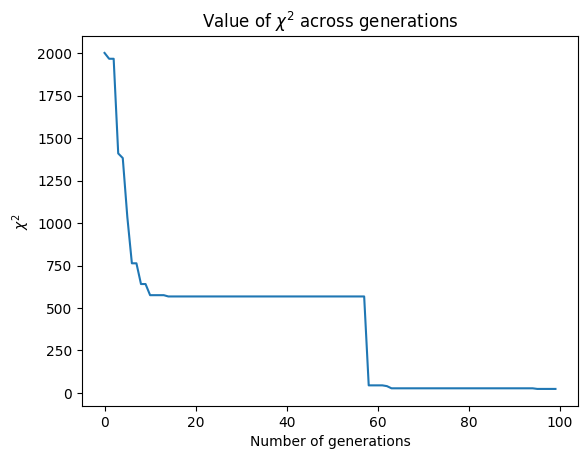

In [64]:
minor_chi = chi
print('The minor chi^2 was: ' + str(min(minor_chi)))
num_generaciones = np.arange(0, len(minor_chi), 1)
plt.plot(num_generaciones, minor_chi)
plt.xlabel('Number of generations')
plt.ylabel('$\chi^2$')
plt.title('Value of $\chi^2$ across generations')
plt.show()

## Best fit encontradas (proceso por optimizar)

### *Best fit found (process to be optimized)*

Hay que calcular manualmente la best fit function encontrada, en el sentido de que el código entrega una lista de la forma: 

[<function coeficiente2 at 0x00000136257E7560>, '+', <function ident at 0x00000136136FEB60>, '*', <function coeficiente2 at 0x00000136257E7560>, '**', <function coeficiente2 at 0x00000136257E7560>, '-', <function coeficiente2 at 0x00000136257E7560>, '*', <function coeficiente2 at 0x00000136257E7560>], 

y hay que tomar en cuenta que el código procesa las expresiones de izquierda a derecha en importancia. Por ejemplo: x + 2 * 4 significa, para el código, (x+2)*4. La composición también se cuenta como una operación. 

____________________________________________________________________________________________________________________________________________

*You have to manually calculate the best fit function found, in the sense that the code provides a list of the form:*

[<function coefficient2 at 0x00000136257E7560>, '+', <function ident at 0x00000136136FEB60>, '*', <function coefficient2 at 0x00000136257E7560>, '**', <function coefficient2 at 0x00000136257E7560>, '-', <function coefficient2 at 0x00000136257E7560>, '*', <function coefficient2 at 0x00000136257E7560>],

*and it must be taken into account that the code processes expressions from left to right in importance. For example: $x + 2 \cdot 4$ means, for the code, $(x+2)\cdot4$. Composition is also counted as an operation.*

In [59]:
def evaluar_expresion(z, expresion):
    resultado = expresion[0](z)

    i = 1
    while i < len(expresion):
        operador = expresion[i]
        funcion = expresion[i + 1]

        if operador == '+':
            resultado = resultado + funcion(z)
        elif operador == '-':
            resultado = resultado - funcion(z)
        elif operador == '*':
            resultado = resultado * funcion(z)
        elif operador == '/':
            resultado = resultado / funcion(z)
        elif operador == '**':
            resultado = resultado ** funcion(z)
        elif operador == 'comp':
            resultado = funcion(resultado) 

        i += 2

    return resultado

# Se calculan chi's y funciones de la ultima generacion (para ver las expresiones sacar # del último print)
evaluadas = []
for expresion in ultima_generacion:
     evaluadas.append(evaluar_expresion(z, expresion))

def calcular_chi(funcion_evaluada, H, desv):
     return np.sum(((H - funcion_evaluada)/desv)**2)

chi_evaluados = []
for evaluada in evaluadas:
     chi_evaluados.append(calcular_chi(evaluada, H, desv))

#print('Los chi de la última generación son: ' + str(chi_evaluados))
#print('La última generación es:' + str(ultima_generacion))

### Lista de funciones encontradas hasta el momento

*List of functions found so far*

In [60]:
def f1(x):
    '''
    chi = 28
    '''
    return (((3 + 3) * 3 )+ (x+1)) * (x+1) * 3

def f2(x):
    '''
    chi = 22
    '''
    return (3**3 + (x+1) + 2) * (x+1) * 2

def f3(x):
    '''
    chi = 19.71640668714861
    Generaciones = 500
    Tiempo = 26.6 s
    '''
    return (((3 / (x+1)) + 3) * (x+1) + 2) ** 2

def f4(x):
    '''
    chi = 31.704314225298248
    Generaciones = 100
    Tiempo = 1.5 s
    '''
    return (5 + 3*(x+1))**2

def f5(x):
    '''
    chi = 31.07962529219873
    Generaciones = 100
    Tiempo = 2 s
    '''
    return ((4 + 2*(x+1))**2)*2 - 2

def f6(x):
    '''
    chi = 31.704314225298234
    Generaciones = 100
    Tiempo = 2 s
    '''
    return 64*(x+1)

def f7(x):
    '''
    chi = 23.936801576272018
    Generaciones = 100
    Tiempo = 1.7 s
    '''
    return 2*(4 + 2*(x+1))**2 - 4

### Comprobación de la constante  $H_0$ (mientras más cerca esté de $70$, mejor)

*Checking the constant $H_0$ (the closer it is to $70$, the better)*

In [61]:
print('Constante para f7: ' + str(f7(0)))

Constante para f7: 68


### Se grafican los datos y la best fit function con menor chi encontrada hasta el momento (fue el último intento)

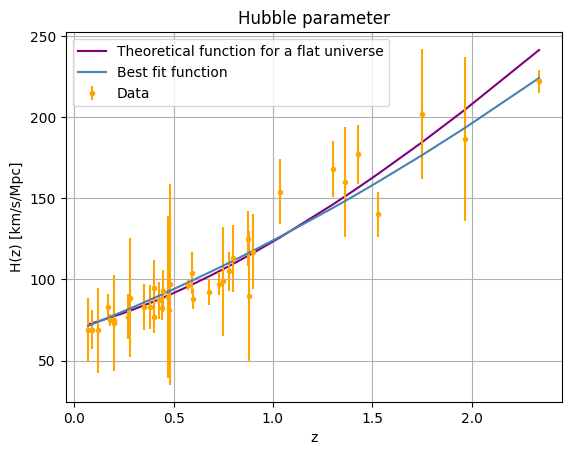

In [62]:
def H_bm(z, Omega_r, Omega_m, Omega_lambda, omega_DE): 
    return H_0*np.sqrt((Omega_r*(1+z)**(3*(1 + 1/3)) + Omega_m*(1+z)**3 + Omega_lambda*(1+z)**(3*(1+omega_DE)) + (1-Omega_r-Omega_m-Omega_lambda)*(1+z)**2))

# Parámetros a usar
H_0 = 70
O_r = 8.4*10**(-5)
O_m = 0.3
O_lambda = 0.7 - 8.4*10**(-5)
o_DE = -1
O_0 = [0.5, 1, 1.5]


# Funciones teóricas para los 3 tipos de universo
H_teorico_plano = H_bm(z,O_r, O_m, O_lambda, o_DE)
H_teorico_cerrado = H_bm(z,O_r, O_m, 0.9*O_lambda, o_DE)
H_teorico_abierto = H_bm(z,O_r, O_m, 1.1*O_lambda, o_DE)

# Se grafica función teórica para universo plano vs best fit function y se añaden los datos experimentales con su error respectivo
plt.plot(z, H_teorico_plano, label = 'Theoretical function for a flat universe', color = 'purple')
plt.errorbar(z, H, yerr=desv, fmt='.', label='Data', color = 'orange')
plt.plot(z, f7(z), label= 'Best fit function', color = '#4682B4')
plt.title('Hubble parameter')
plt.xlabel('z')
plt.ylabel('H(z) [km/s/Mpc]')
plt.grid(True)
plt.legend()
plt.show()

### Bibliography: 

All this algorithm was based, globally, in the three classes created by the GA of Fernando Zepeda. GitHub link: https://github.com/Fmrhj/genetic-algorithm